In [ ]:
import numpy as np
def koch(origin, dir, depth):
    if depth == 0:
        return [v,]
    

In [14]:
def koch(depth):
    if depth == 0:
        return []
    return koch(depth-1) + [depth,] + koch(depth-1)

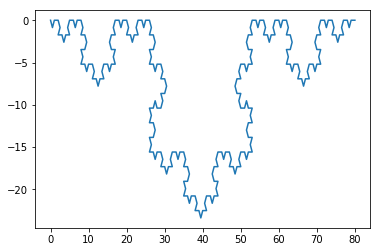

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from math import sin,cos,pi
d=np.array([1.0, 0.0])
da = 60*pi/180 # rotation angle
s, c = sin(da), cos(da)
R = np.array([[c,-s],[s,c]])
Ri = np.linalg.inv(R)
p=np.zeros(2)
path=[p.copy(),]
for bit in koch(7):
    if bit%2 == 0:
        d = d @ R
    else:
        d = d @ Ri @ Ri
    p += d
    path.append(p.copy())

path = np.array(path)
plt.plot(path[:,0], path[:,1])

In [32]:
"".join(["hc"[x%2] for x in koch(4)])

'chccchchchccchc'

In [29]:
def validate(s):
    d = 1
    acc = 0
    for c in s:
        acc += d
        if c == "h":
            d = -d
    return acc%3 == 0

validate("".join(["hc"[x%2] for x in koch(3)]))

False

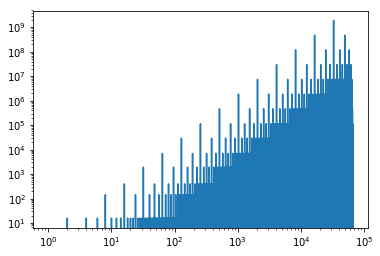

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
x = np.array(koch(16) + [0], dtype=float)
x = x%2
x = x*2-1
y = np.abs(np.fft.fft(x))**2

plt.loglog(y)
plt.show()
